<a href="https://colab.research.google.com/github/nishitgala89/ProjectDissertation/blob/main/Code/4_Modelling/MorningStar_RemovedDuplicates_Modelling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Mounting Google Drive**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
rand_state = 42 # 42

###**Import Libraries**

In [3]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler



In [4]:
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_test,y_pred,uniqueclassLabel, title="CMatrix"):
  cm = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=uniqueclassLabel)
  plt.figure(figsize=(5,4))
  plt.title(title)
  #ax = plt.subplot()
  sns.heatmap(cm, annot=True,cmap='Blues',
              yticklabels=uniqueclassLabel,xticklabels=uniqueclassLabel,fmt='3g')

###**Import Utility File**

In [5]:
# import sys
# path = "/content/drive/MyDrive/Colab Notebooks/Project_Dissertation"
# sys.path.insert(0,path + "/Code")
# import morningStarUtilities

In [6]:
user = 'nishitgala89'
repo = 'ProjectDissertation'
src_dir = "Code/utilities"
pyfile = "morningStarUtilities.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2021-11-29 16:08:50--  https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/utilities/morningStarUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6484 (6.3K) [text/plain]
Failed to rename morningStarUtilities.py to morningStarUtilities.py.1: (2) No such file or directory
Saving to: ‘morningStarUtilities.py’

morningStarUtilitie 100%[===================>]   6.33K  --.-KB/s    in 0s      

2021-11-29 16:08:50 (65.2 MB/s) - ‘morningStarUtilities.py’ saved [6484/6484]



In [7]:
# import subprocess

# result = subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)
# print(result.stderr.decode("utf-8"))

import morningStarUtilities

### **Import Training Data**

In [8]:
# uploaded = files.upload()
# train_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_train_withoutM60.csv']))
# train_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")
train_df = pd.read_csv("https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv").set_index("SecId")

### **Import Testing Data**

In [9]:
# uploaded = files.upload()
# test_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_test_withoutM60.csv']))
#test_df = pd.read_csv(path + "/Data/Final_without_missing_values/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv").set_index("SecId")
test_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv').set_index("SecId")

In [10]:
train_df

,Name,StarRatingM255,SustainabilityRank,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Cat_Flex-Cap,Cat_Income,Cat_Large-Cap,Cat_Mid_Small-Cap,Cat_Miscellaneous,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F000005ETU,Barings Europe Select A EUR Acc,3,4,0.0,0.85,5.10,9.42,21.86,16.19,38.51,9.65,5.00,1.55,0.34,16.67,1.429875e+09,3978.65175,2,0.16,0.88,96.29,17.05,0.57,3,3,3.0,0,0,0,0,1,0,2,3
F0GBR061MQ,Schroder ISF Sust Swiss Eq C Acc CHF,2,2,0.0,1.93,8.73,10.76,18.20,14.37,27.85,6.80,1.00,1.06,0.08,15.83,3.204443e+07,29776.97728,4,-7.08,1.10,85.04,12.23,0.57,2,3,3.0,0,0,0,0,0,1,1,2
F00000ZS1K,Berenberg European Small Cap B,5,2,0.0,0.15,2.60,11.32,25.96,17.16,51.01,19.50,0.00,0.24,0.23,3.67,6.737833e+08,1698.74791,3,10.19,0.99,86.05,21.60,0.92,3,3,3.0,0,0,0,0,1,0,3,3
F000000ITQ,Candriam Eqs L Eurp Optm Qual I EUR Cap,3,4,0.0,0.79,1.74,7.45,11.52,9.99,21.32,7.40,0.00,0.75,0.22,7.17,8.404491e+08,20347.16148,1,-3.22,0.92,93.88,12.45,0.55,2,3,3.0,0,0,0,1,0,0,1,3
F00000SX9M,Janus Henderson INTECH EurpCor A2 EUR,5,3,0.0,0.66,4.99,9.64,20.98,17.27,37.58,8.79,5.00,1.75,1.05,7.42,1.182744e+08,17329.54942,3,1.56,0.95,92.89,15.08,0.54,3,3,3.0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F00000XH8D,ASSII-Europ Focus Eq B Acc GBP,3,3,0.0,0.82,3.94,3.87,7.06,5.43,21.80,4.88,5.00,1.03,0.40,1.92,1.041660e+07,34607.87874,3,-1.06,0.99,91.43,16.16,0.36,2,3,3.0,0,0,0,1,0,0,1,3
F0GBR04BDY,MS INVF European Property A,1,5,0.0,1.71,6.65,15.12,20.83,18.35,29.84,1.29,5.75,1.65,0.26,23.75,3.776127e+07,4036.57364,5,-4.73,1.33,89.06,24.26,0.10,3,1,3.0,0,0,0,0,0,1,2,1
F0GBR04SFG,MSMM European Small Cap A,2,3,0.0,-0.06,0.54,9.39,24.04,18.01,43.01,5.45,5.00,2.13,0.59,2.25,5.323047e+07,2464.49043,4,-3.74,1.05,98.54,20.81,0.31,2,2,2.0,0,0,0,0,1,0,2,2


In [11]:
train_df.groupby("StarRatingM255")['GBRReturnM36'].agg(['mean','min','max'])

,mean,min,max
StarRatingM255,,,
1,0.522333,-11.74,8.57
2,3.529188,-4.60,14.50
3,6.013062,-3.30,19.63
4,7.636444,1.06,20.11
5,10.041905,1.75,21.59


### **Defining Training, Testing varibales**

In [12]:
imp_features = ['SustainabilityRank','GBRReturnM1','GBRReturnM3','GBRReturnM0','GBRReturnM36','OngoingCostActual','TransactionFeeActual','FundTNAV',
'AverageMarketCapital','MorningstarRiskM255','AlphaM36','BetaM36','StandardDeviationM36','SharpeM36','Size','Style']
X_train = train_df[imp_features]
y_train = train_df['StarRatingM255']

X_test = test_df[imp_features]
y_test = test_df['StarRatingM255']

In [13]:
X_train.shape, y_train.shape

((886, 16), (886,))

In [14]:
# X_train = train_df.drop(['StarRatingM255','Name'],axis=1)
# y_train = train_df[['StarRatingM255']]
# X_test = test_df.drop(['StarRatingM255','Name'],axis=1)
# y_test = test_df[['StarRatingM255']]
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

### **Scaling the Data**

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Verify the Training and Testing distribution as per Target Variable**

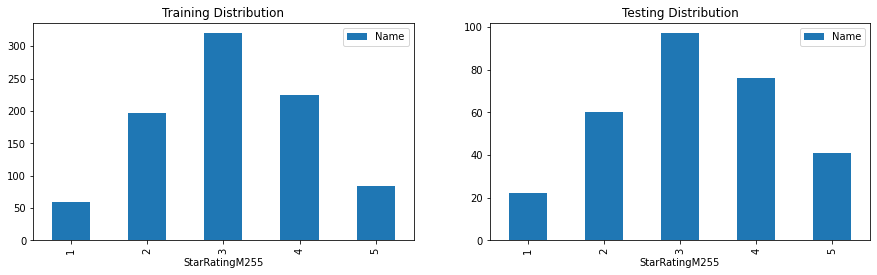

In [16]:
morningStarUtilities.displayBarSubPlots([train_df,test_df],["Training Distribution", "Testing Distribution"],
                   "StarRatingM255")

### **Creating runtime variables**

In [17]:
unique_class_label = list(train_df.StarRatingM255.unique())
unique_class_label.sort()
unique_class_label

[1, 2, 3, 4, 5]

In [18]:
cv_accuracy_metrics = []
cv_balanced_metrics = []
cv_f1_metrics = []

In [19]:
cv_mean = []
cv_std = []
cv_bal_mean = []
cv_bal_std = []
f1_w_mean = []
f1_w_std = []

### **Defining Classifiers**

In [20]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 62 kB/s 


In [21]:
# # Setting Manual class weights
class_wt_default = {0: 2.25,
                1: 1.15,
                2: 1.05,
                3: 1.15,
                4: 2.25}
# class_wt = {1: 2.25,
#                 2: 1.15,
#                 3: 1.05,
#                 4: 1.15,
#                 5: 2.25}

# from catboost import CatBoostClassifier
# clfs = []
# clfs.append(RandomForestClassifier(n_estimators=1015,max_depth=5, max_features=0.6387658534305876,random_state=rand_state, criterion="entropy",class_weight=class_wt))
# #clfs.append(CatBoostClassifier(verbose=False, random_state=rand_state,class_weights=class_wt))
# #clfs.append(AdaBoostClassifier(n_estimators=100,random_state=rand_state,learning_rate=0.8,base_estimator=DecisionTreeClassifier(max_depth=5, random_state=rand_state, max_features=0.65, criterion="entropy")))
# clfs.append(BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000, random_state=rand_state, class_weight=class_wt_default),bootstrap_features=False,
#                               max_features=0.7,max_samples=0.6, n_estimators=500, n_jobs=-1))
# clfs.append(LogisticRegression(max_iter=1000,random_state=rand_state,class_weight= class_wt ))
# clfs.append(SVC(probability=True, random_state=rand_state,class_weight=class_wt))
# #clfs.append(XGBClassifier(n_estimators=500, max_depth=8, random_state=rand_state,verbose=False, class_weights=class_wt_default))
# len(clfs)

In [22]:
y_train.unique(), y_test.unique()

(array([3, 2, 5, 4, 1]), array([3, 5, 2, 4, 1]))

In [23]:
from catboost import CatBoostClassifier
clfs = []
clfs.append(RandomForestClassifier(n_estimators=250,max_depth=10, max_features='sqrt',
                                   random_state=rand_state, criterion="gini"))
clfs.append(CatBoostClassifier(verbose=False, random_state=rand_state))
clfs.append(XGBClassifier(n_estimators=250, max_depth=10, random_state=rand_state,verbose=1,learning_rate=0.001,
                          verbosity=1,booster='dart', normalize_type='forest', rate_drop = 0.3, subsample = 0.4,
                          objective='multi:softprob'))
clfs.append(BaggingClassifier(base_estimator=LogisticRegression(max_iter=5000, random_state=rand_state),bootstrap_features=False,
                             max_features=0.7,max_samples=0.6, n_estimators=250, n_jobs=-1))
clfs.append(LogisticRegression(max_iter=1000,random_state=rand_state ))
clfs.append(SVC(probability=True, random_state=rand_state,C=10, kernel='rbf', gamma='auto'))
##clfs.append(AdaBoostClassifier(n_estimators=100,random_state=rand_state,learning_rate=0.8,base_estimator=DecisionTreeClassifier(max_depth=5, random_state=rand_state, max_features=0.65, criterion="entropy")))

len(clfs)

6

In [24]:
for clf in clfs:
  print(clf.__class__.__name__)

RandomForestClassifier
CatBoostClassifier
XGBClassifier
BaggingClassifier
LogisticRegression
SVC


In [25]:
scaled_clf = ['LogisticRegression', 'SVC', 'BaggingClassifier']

### **5-Fold Cross Validation**

In [26]:
skf = StratifiedKFold(n_splits=5, random_state=rand_state, shuffle=True)
for clf in clfs:
  if clf.__class__.__name__  in scaled_clf:
    cv_accuracy_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'accuracy',
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_balanced_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'balanced_accuracy', 
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_f1_metrics.append(cross_val_score(clf, X_train_scaled, y_train, scoring = 'f1_weighted', 
                                      cv = skf,verbose=2,n_jobs=-1))
  
  else:

    cv_accuracy_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'accuracy',
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_balanced_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'balanced_accuracy', 
                                      cv = skf,verbose=2,n_jobs=-1))
    cv_f1_metrics.append(cross_val_score(clf, X_train, y_train, scoring = 'f1_weighted', 
                                      cv = skf,verbose=2,n_jobs=-1))
for clf_result in cv_accuracy_metrics:
  cv_mean.append(clf_result.mean())
  cv_std.append(clf_result.std())

for clf_result in cv_balanced_metrics:
  cv_bal_mean.append(clf_result.mean())
  cv_bal_std.append(clf_result.std())

for clf_result in cv_f1_metrics:
  f1_w_mean.append(clf_result.mean())
  f1_w_std.append(clf_result.std())

result_df = pd.DataFrame({'Classifier' :  [clf.__class__.__name__  for clf in clfs],
                          'CV_Accuracy Mean': cv_mean,'CV_Accuracy Std' : cv_std,
                          'CV_Bal_Accuracy Mean': cv_bal_mean,'CV_Bal_Accuracy Std' : cv_bal_std,
                          'CV_f1_weighted Mean': f1_w_mean,'V_f1_weighted Std' : f1_w_std
                          })

result_df.sort_values(by='CV_Accuracy Mean',ascending=False, ignore_index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_

,Classifier,CV_Accuracy Mean,CV_Accuracy Std,CV_Bal_Accuracy Mean,CV_Bal_Accuracy Std,CV_f1_weighted Mean,V_f1_weighted Std
3,BaggingClassifier,0.525976,0.023871,0.450277,0.045487,0.515576,0.032943
4,LogisticRegression,0.518060,0.029768,0.471455,0.043051,0.514901,0.031016
2,XGBClassifier,0.477420,0.032557,0.422372,0.043924,0.471197,0.034774
0,RandomForestClassifier,0.460541,0.029992,0.403935,0.030446,0.454523,0.027347
1,CatBoostClassifier,0.454859,0.021424,0.406586,0.016917,0.451043,0.020593
5,SVC,0.433403,0.013816,0.388744,0.024309,0.429489,0.011903


## **Prediction Run**

Accuracy Score for RandomForestClassifier  0.44256756756756754
F1 Score for RandomForestClassifier  0.43250625360569867
Accuracy Score for CatBoostClassifier  0.42905405405405406
F1 Score for CatBoostClassifier  0.42539337421702367
Accuracy Score for XGBClassifier  0.4864864864864865
F1 Score for XGBClassifier  0.4804244872879516
Accuracy Score for BaggingClassifier  0.5033783783783784
F1 Score for BaggingClassifier  0.4909595339208717
Accuracy Score for LogisticRegression  0.5236486486486487
F1 Score for LogisticRegression  0.5169462517808106
Accuracy Score for SVC  0.43243243243243246
F1 Score for SVC  0.4303300577558798


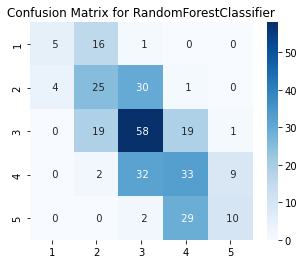

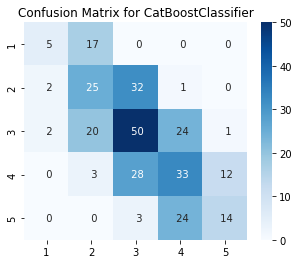

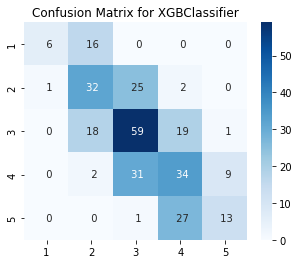

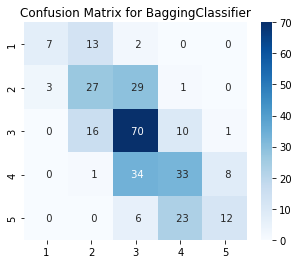

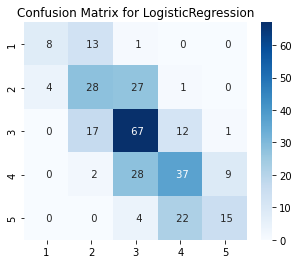

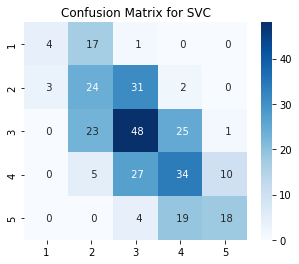

In [27]:
test_acc_score=[]
test_f1_score=[]
clfList = [clf.__class__.__name__  for clf in clfs]


def run_predict(clf):
  if clf.__class__.__name__ in scaled_clf:
    clf = clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
  else:
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
  plot_conf_matrix(y_test,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
  print("Accuracy Score for " +  clf.__class__.__name__ + "  " 
        + str(accuracy_score(y_test,y_pred)) )
  print("F1 Score for " + clf.__class__.__name__ + "  " + 
        str(f1_score(y_test, y_pred, average='weighted')))
  
  test_acc_score.append(accuracy_score(y_test,y_pred))
  test_f1_score.append(f1_score(y_test, y_pred, average='weighted'))
  
for clf in clfs:
  run_predict(clf)



In [28]:
result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
4,LogisticRegression,0.523649,0.516946
3,BaggingClassifier,0.503378,0.490960
2,XGBClassifier,0.486486,0.480424
0,RandomForestClassifier,0.442568,0.432506
5,SVC,0.432432,0.430330
1,CatBoostClassifier,0.429054,0.425393


## **Prediction using Pre-trained Neural Network Model**

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Fetching the Saved Model JSON File from Github

In [30]:
import requests, json
from  urllib.request import Request, build_opener
url = 'https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model.json'
req = Request(url)
opener = build_opener()
f = opener.open(req)
with open('ann_model.json', 'w') as json_file:
    json.dump(json.loads(f.read()), json_file)

In [31]:
with open('/content/ann_model.json', 'r') as model_file:
  json_saved_model = model_file.read()
network_loaded = tf.keras.models.model_from_json(json_saved_model)

### Fetching the Model Weights from Github

In [32]:
src_dir = "Code/4_Modelling/Artificial_Neural_Network/Model1"
weight_file = "model_weights.hdf5"
url = f"https://github.com/{user}/{repo}/blob/main/{src_dir}/{weight_file}?raw=true"

!wget --no-cache --backups=1 {url}

--2021-11-29 16:17:14--  https://github.com/nishitgala89/ProjectDissertation/blob/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model_weights.hdf5?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nishitgala89/ProjectDissertation/raw/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model_weights.hdf5 [following]
--2021-11-29 16:17:15--  https://github.com/nishitgala89/ProjectDissertation/raw/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model_weights.hdf5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/4_Modelling/Artificial_Neural_Network/Model1/model_weights.hdf5 [following]
--2021-11-29 16:17:15--  https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/C

In [33]:
import os
fileNames = list(os.listdir())
fileNames
for fname in fileNames:
  if fname.startswith('model_weights'):
    fsplit = fname.split("?")
    os.rename(fname, fsplit[0])

In [34]:
network_loaded.load_weights('/content/model_weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [35]:
y_pred_loaded = network_loaded.predict(X_test_scaled)
y_pred_loaded = np.argmax(y_pred_loaded, axis=1)
y_pred_loaded +=1

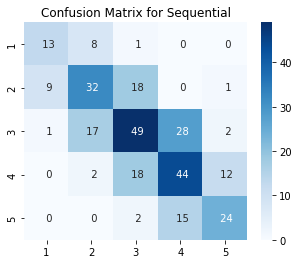

In [36]:
plot_conf_matrix(y_test.values,y_pred_loaded,unique_class_label, title="Confusion Matrix for " + network_loaded.__class__.__name__)

In [37]:
test_acc_score.append(accuracy_score(y_test, y_pred_loaded))
test_f1_score.append(f1_score(y_test, y_pred_loaded, average='weighted'))
clfList.append("Artificial_Neural_Network")

## **Voting Classifier**

In [38]:
### Creating Estimators list of Tuples
estimators =[]
for clf in clfs:
  estimators.append((clf.__class__.__name__,clf))

#estimators

In [39]:
from sklearn.ensemble import VotingClassifier
ensemble= VotingClassifier(estimators=estimators, 
                          voting='soft', 
                          flatten_transform=True)

In [40]:
ensemble = ensemble.fit(X_train_scaled,y_train)

In [41]:
y_ensemble = ensemble.predict(X_test_scaled)

In [42]:
test_acc_score.append(accuracy_score(y_test, y_ensemble))
test_f1_score.append(f1_score(y_test, y_ensemble, average='weighted'))
clfList.append("VotingClassifier")

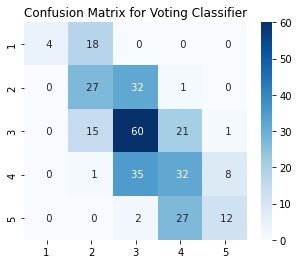

In [43]:
plot_conf_matrix(y_test,y_ensemble,unique_class_label, title="Confusion Matrix for " + "Voting Classifier")

In [44]:
result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
6,Artificial_Neural_Network,0.547297,0.547279
4,LogisticRegression,0.523649,0.516946
3,BaggingClassifier,0.503378,0.490960
2,XGBClassifier,0.486486,0.480424
7,VotingClassifier,0.456081,0.445616
0,RandomForestClassifier,0.442568,0.432506
5,SVC,0.432432,0.430330
1,CatBoostClassifier,0.429054,0.425393


## **Prediction Run for Asia Data (Model Generalization Test as this data is not used in Training)**

In [45]:
asia_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/3_Modelling/Generalization_Check_Asia_Developed.csv').set_index("SecId")
asia_df = morningStarUtilities.createSize_InvestmentTypeFeature(asia_df)


In [46]:
asia_df[imp_features].isnull().sum()

SustainabilityRank      0
GBRReturnM1             0
GBRReturnM3             0
GBRReturnM0             0
GBRReturnM36            0
OngoingCostActual       0
TransactionFeeActual    0
FundTNAV                1
AverageMarketCapital    0
MorningstarRiskM255     0
AlphaM36                0
BetaM36                 0
StandardDeviationM36    0
SharpeM36               0
Size                    0
Style                   0
dtype: int64

In [47]:
asia_df[asia_df.FundTNAV.isnull()]

,Name,StarRatingM255,SustainabilityRank,CategoryName,Yield_M12,GBRReturnW1,GBRReturnM1,GBRReturnM3,GBRReturnM6,GBRReturnM0,GBRReturnM12,GBRReturnM36,GBRReturnM60,MaxFrontEndLoad,OngoingCostActual,TransactionFeeActual,ManagerTenure,FundTNAV,EquityStyleBox,AverageMarketCapital,MorningstarRiskM255,AlphaM36,BetaM36,R2M36,StandardDeviationM36,SharpeM36,ReturnProfilePreservation,ReturnProfileIncome,ReturnProfileHedging,TrackRecordExtension,Size,Style
SecId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F00001071Q,BIEF Emerging Markets A GBP Acc,4,2,Global Emerging Markets Equity,0.62047,1.43,1.64,-3.35,-7.72,0.09,10.79,10.05,NaN,NaN,1.12,1.17,24.08,NaN,2,28614.24791,4,2.47,1.02,89.7,16.24,0.66,3,1,3.0,False,1,2


In [48]:
asia_df.drop(index='F00001071Q',inplace=True)


In [49]:
X_asia = asia_df[imp_features]
y_asia = asia_df['StarRatingM255']
X_asia_scaled = scaler.transform(X_asia)

In [50]:
X_asia.shape, y_asia.shape

((432, 16), (432,))

Accuracy Score for RandomForestClassifier  0.47685185185185186
F1 Score for RandomForestClassifier  0.4568103447801839
Accuracy Score for CatBoostClassifier  0.42824074074074076
F1 Score for CatBoostClassifier  0.41598053446339095
Accuracy Score for XGBClassifier  0.47685185185185186
F1 Score for XGBClassifier  0.4433409167938139
Accuracy Score for BaggingClassifier  0.49074074074074076
F1 Score for BaggingClassifier  0.47777586773835956
Accuracy Score for LogisticRegression  0.49537037037037035
F1 Score for LogisticRegression  0.4782246027968384
Accuracy Score for SVC  0.3333333333333333
F1 Score for SVC  0.32907700442320226


,Classifier,Testing_Accuracy,Testing_F1-score
4,LogisticRegression,0.495370,0.478225
3,BaggingClassifier,0.490741,0.477776
0,RandomForestClassifier,0.476852,0.456810
2,XGBClassifier,0.476852,0.443341
1,CatBoostClassifier,0.428241,0.415981
5,SVC,0.333333,0.329077


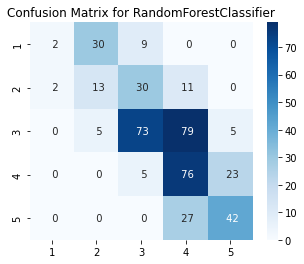

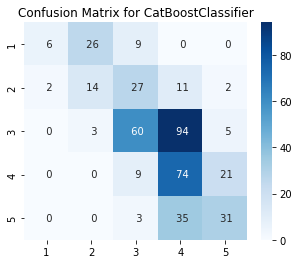

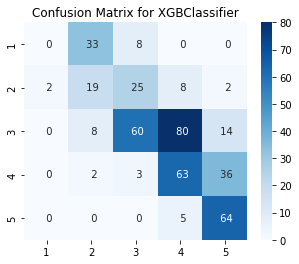

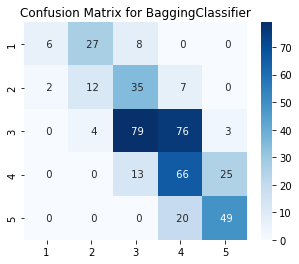

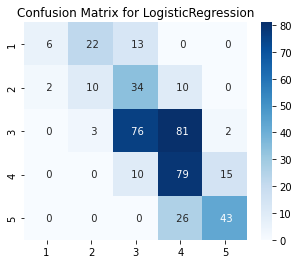

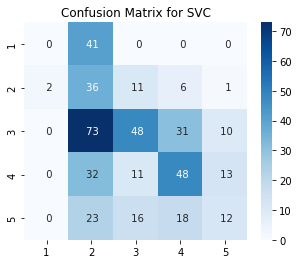

In [51]:
test_acc_score=[]
test_f1_score=[]
clfList = [clf.__class__.__name__  for clf in clfs]


def run_predict_for_untrainedData(clf):
  if clf.__class__.__name__ in scaled_clf:   
    y_pred = clf.predict(X_asia_scaled)
  else:
    y_pred = clf.predict(X_asia)
  plot_conf_matrix(y_asia,y_pred,unique_class_label, title="Confusion Matrix for " + clf.__class__.__name__)
  print("Accuracy Score for " +  clf.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia,y_pred)) )
  print("F1 Score for " + clf.__class__.__name__ + "  " + 
        str(f1_score(y_asia, y_pred, average='weighted')))
  
  test_acc_score.append(accuracy_score(y_asia,y_pred))
  test_f1_score.append(f1_score(y_asia, y_pred, average='weighted'))
  
for clf in clfs:
  run_predict_for_untrainedData(clf)

result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

In [52]:
y_asia_pred = network_loaded.predict(X_asia_scaled)
y_asia_pred = np.argmax(y_asia_pred, axis=1)
y_asia_pred += 1

In [53]:
print("Accuracy Score for " +  network_loaded.__class__.__name__ + "  " 
        + str(accuracy_score(y_asia.values,y_asia_pred)) )
print("F1 Score for " + network_loaded.__class__.__name__ + "  " + 
        str(f1_score(y_asia.values, y_asia_pred, average='weighted')))

Accuracy Score for Sequential  0.5254629629629629
F1 Score for Sequential  0.4940838050206563


In [54]:
test_acc_score.append(accuracy_score(y_asia,y_asia_pred))
test_f1_score.append(f1_score(y_asia, y_asia_pred, average='weighted'))
clfList.append("Artificial_Neural_Network")

In [55]:
y_ensemble = ensemble.predict(X_asia_scaled)
test_acc_score.append(accuracy_score(y_asia,y_ensemble))
test_f1_score.append(f1_score(y_asia, y_ensemble, average='weighted'))
clfList.append("Voting Classifier")

In [56]:
result_df = pd.DataFrame({'Classifier' :  clfList,
                          'Testing_Accuracy': test_acc_score,
                          'Testing_F1-score': test_f1_score                          
                          })    
result_df.sort_values(by="Testing_Accuracy", ascending=False)

,Classifier,Testing_Accuracy,Testing_F1-score
6,Artificial_Neural_Network,0.525463,0.494084
4,LogisticRegression,0.495370,0.478225
3,BaggingClassifier,0.490741,0.477776
0,RandomForestClassifier,0.476852,0.456810
2,XGBClassifier,0.476852,0.443341
7,Voting Classifier,0.474537,0.458637
1,CatBoostClassifier,0.428241,0.415981
5,SVC,0.333333,0.329077
